In [49]:
from sklearn.datasets import make_blobs
#from Kmeans import KMeans
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

import random 

In [50]:
#Make the dataset

centroids = [(-5,-5) , (5,5)]
cluster_std = [1,1]

X,y = make_blobs(n_samples = 100, cluster_std = cluster_std , centers = centroids, n_features = 2 , random_state = 2)



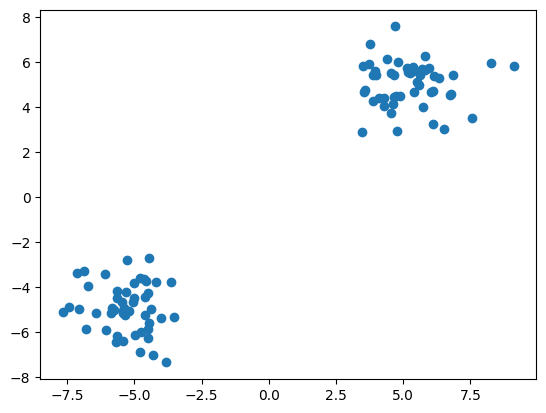

In [64]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [67]:
class KMeans:
    def __init__(self,n_clusters = 2, max_iter = 100):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        centroids_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[centroids_index]
        #print(self.centroids)


        for i in range(self.max_iter):
            #Assign clusters 
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            
            # Move centroids 
            self.centroids = self.move_centroids(X, cluster_group)

            #Check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group


    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centriod in self.centroids:
                distances.append(np.sqrt(np.dot(row - centriod, row - centriod)))
            min_distance = min(distances)
            index_position = distances.index(min_distance)
            cluster_group.append(index_position)
            distances.clear()

        
        return np.array(cluster_group)

    def move_centroids(self,X, cluster_group):

        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis = 0)) #Column wise mean
        return np.array(new_centroids)

    
    

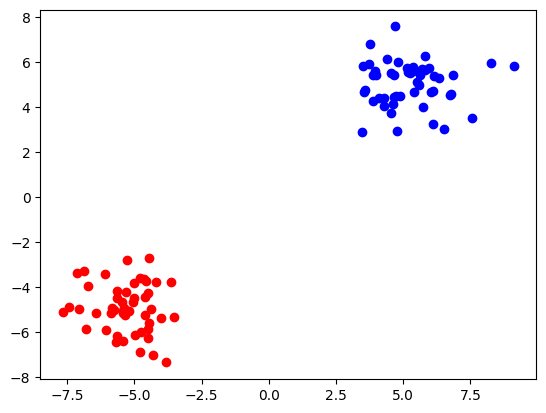

In [68]:
km = KMeans(n_clusters = 2, max_iter = 100)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color = "red")
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color = "blue")
plt.show()